In [89]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [90]:
rent_data = pd.read_csv("../Data-Analysis-Project-1/price.csv")

rent_data

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
0,6181,New York,New York,Queens,NY,1,NaN,NaN,NaN,NaN,...,2334,2339,2345,2344,2336,2324,2318,2321,2321,2322
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,2184.0,2184.0,2183.0,2188.0,...,2637,2662,2687,2704,2716,2723,2731,2740,2748,2753
2,17426,Chicago,Chicago,Cook,IL,3,1563.0,1555.0,1547.0,1537.0,...,1684,1686,1687,1685,1681,1675,1668,1656,1644,1632
3,39051,Houston,Houston,Harris,TX,4,1198.0,1199.0,1199.0,1200.0,...,1444,1446,1446,1443,1440,1438,1437,1437,1435,1430
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,1092.0,1099.0,1094.0,1087.0,...,1206,1211,1218,1222,1223,1220,1216,1211,1209,1212
5,40326,Phoenix,Phoenix,Maricopa,AZ,6,1087.0,1080.0,1071.0,1067.0,...,1228,1236,1240,1240,1238,1238,1239,1241,1244,1247
6,18959,Las Vegas,Las Vegas,Clark,NV,7,1188.0,1183.0,1178.0,1177.0,...,1222,1225,1227,1227,1227,1228,1230,1234,1237,1239
7,6915,San Antonio,San Antonio,Bexar,TX,8,1057.0,1043.0,1037.0,1032.0,...,1244,1245,1245,1241,1236,1234,1235,1239,1245,1250
8,54296,San Diego,San Diego,San Diego,CA,9,2070.0,2059.0,2043.0,2030.0,...,2414,2428,2438,2442,2441,2442,2449,2457,2465,2469
9,38128,Dallas,Dallas-Fort Worth,Dallas,TX,10,1114.0,1135.0,1156.0,1159.0,...,1338,1347,1353,1358,1364,1370,1377,1385,1389,1391


In [91]:
# Compare cities in North Carolina
nc_cities = rent_data.loc[rent_data["State"] == "NC", :]

nc_cities.head(10)

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
19,24043,Charlotte,Charlotte,Mecklenburg,NC,20,1024.0,1022.0,1024.0,1026.0,...,1276,1283,1289,1289,1287,1285,1285,1286,1290,1294
50,54047,Raleigh,Raleigh,Wake,NC,51,1190.0,1193.0,1194.0,1194.0,...,1373,1376,1375,1373,1370,1370,1373,1378,1382,1384
81,24457,Durham,Durham,Durham,NC,82,1143.0,1142.0,1132.0,1126.0,...,1283,1286,1288,1287,1287,1288,1292,1295,1299,1300
87,11722,Greensboro,NaN,Guilford,NC,88,905.0,907.0,917.0,927.0,...,986,984,982,980,979,977,976,979,984,989
103,52001,Fayetteville,Fayetteville,Cumberland,NC,104,891.0,889.0,883.0,880.0,...,852,850,848,847,845,845,846,847,848,850
110,41760,Winston-Salem,Winston-Salem,Forsyth,NC,111,889.0,897.0,902.0,897.0,...,990,994,995,992,988,985,985,988,986,982
253,51297,Cary,Raleigh,Wake,NC,254,1479.0,1482.0,1487.0,1494.0,...,1682,1675,1675,1673,1675,1675,1680,1687,1693,1699
306,21320,Wilmington,Wilmington,New Hanover,NC,307,1088.0,1083.0,1076.0,1072.0,...,1256,1258,1261,1264,1265,1262,1258,1258,1262,1267
326,39134,Jacksonville,Jacksonville,Onslow,NC,327,987.0,986.0,987.0,985.0,...,883,878,873,867,861,857,854,852,850,848
409,17551,Concord,Charlotte,Cabarrus,NC,410,1001.0,1010.0,1016.0,1017.0,...,1229,1230,1232,1233,1234,1232,1231,1235,1239,1240


In [92]:
# Drop extra columns
# Since there are so many months that creates too much columns
# Wanted to get rid of some to make the line graph more viewable
nc_cities = nc_cities.drop(columns=['County', 'November 2010', 'December 2010', 'February 2011',
                                   'March 2011', 'April 2011', 'May 2011', 'June 2011',
                                   'July 2011', 'August 2011', 'September 2011', 'October 2011',
                                   'November 2011', 'December 2011', 'February 2012',
                                   'March 2012', 'April 2012', 'May 2012', 'June 2012',
                                   'July 2012', 'August 2012', 'September 2012', 'October 2012',
                                   'November 2012', 'December 2012', 'February 2013',
                                   'March 2013', 'April 2013', 'May 2013', 'June 2013',
                                   'July 2013', 'August 2013', 'September 2013', 'October 2013',
                                   'November 2013', 'December 2013', 'February 2014',
                                   'March 2014', 'April 2014', 'May 2014', 'June 2014',
                                   'July 2014', 'August 2014', 'September 2014', 'October 2014',
                                   'November 2014', 'December 2014', 'February 2015',
                                   'March 2015', 'April 2015', 'May 2015', 'June 2015',
                                   'July 2015', 'August 2015', 'September 2015', 'October 2015',
                                   'November 2015', 'December 2015', 'February 2016',
                                   'March 2016', 'April 2016', 'May 2016', 'June 2016',
                                   'July 2016', 'August 2016', 'September 2016', 'October 2016',
                                   'November 2016', 'December 2016'])

nc_cities.head(10)

,City Code,City,Metro,State,Population Rank,January 2011,January 2012,January 2013,January 2014,January 2015,January 2016,January 2017
19,24043,Charlotte,Charlotte,NC,20,1024.0,1086.0,1128,1173,1213,1252,1294
50,54047,Raleigh,Raleigh,NC,51,1194.0,1211.0,1222,1269,1319,1351,1384
81,24457,Durham,Durham,NC,82,1132.0,1127.0,1154,1191,1239,1260,1300
87,11722,Greensboro,NaN,NC,88,917.0,953.0,892,954,967,978,989
103,52001,Fayetteville,Fayetteville,NC,104,883.0,857.0,856,861,856,850,850
110,41760,Winston-Salem,Winston-Salem,NC,111,902.0,904.0,925,979,963,974,982
253,51297,Cary,Raleigh,NC,254,1487.0,1495.0,1522,1552,1658,1691,1699
306,21320,Wilmington,Wilmington,NC,307,1076.0,1066.0,1186,1205,1197,1250,1267
326,39134,Jacksonville,Jacksonville,NC,327,987.0,953.0,940,927,900,891,848
409,17551,Concord,Charlotte,NC,410,1016.0,1075.0,1095,1115,1161,1227,1240


In [93]:
# Since there are so many cities in NC, grab the top 10 most populated cities
nc_cities = nc_cities.loc[nc_cities["Population Rank"] <= 410, [
    "City", "State", "Population Rank", "January 2011", 
    "January 2012", "January 2013", "January 2014", "January 2015", 
    "January 2016", "January 2017"]]

nc_cities

,City,State,Population Rank,January 2011,January 2012,January 2013,January 2014,January 2015,January 2016,January 2017
19,Charlotte,NC,20,1024.0,1086.0,1128,1173,1213,1252,1294
50,Raleigh,NC,51,1194.0,1211.0,1222,1269,1319,1351,1384
81,Durham,NC,82,1132.0,1127.0,1154,1191,1239,1260,1300
87,Greensboro,NC,88,917.0,953.0,892,954,967,978,989
103,Fayetteville,NC,104,883.0,857.0,856,861,856,850,850
110,Winston-Salem,NC,111,902.0,904.0,925,979,963,974,982
253,Cary,NC,254,1487.0,1495.0,1522,1552,1658,1691,1699
306,Wilmington,NC,307,1076.0,1066.0,1186,1205,1197,1250,1267
326,Jacksonville,NC,327,987.0,953.0,940,927,900,891,848
409,Concord,NC,410,1016.0,1075.0,1095,1115,1161,1227,1240


In [94]:
#Rename columns
nc_cities = nc_cities.rename(columns={"January 2011":"January 2011 Avg Rent", 
                                      "January 2012":"January 2012 Avg Rent", 
                                      "January 2013":"January 2013 Avg Rent", 
                                      "January 2014":"January 2014 Avg Rent", 
                                      "January 2015":"January 2015 Avg Rent", 
                                      "January 2016":"January 2016 Avg Rent", 
                                      "January 2017":"January 2017 Avg Rent"})

nc_cities

,City,State,Population Rank,January 2011 Avg Rent,January 2012 Avg Rent,January 2013 Avg Rent,January 2014 Avg Rent,January 2015 Avg Rent,January 2016 Avg Rent,January 2017 Avg Rent
19,Charlotte,NC,20,1024.0,1086.0,1128,1173,1213,1252,1294
50,Raleigh,NC,51,1194.0,1211.0,1222,1269,1319,1351,1384
81,Durham,NC,82,1132.0,1127.0,1154,1191,1239,1260,1300
87,Greensboro,NC,88,917.0,953.0,892,954,967,978,989
103,Fayetteville,NC,104,883.0,857.0,856,861,856,850,850
110,Winston-Salem,NC,111,902.0,904.0,925,979,963,974,982
253,Cary,NC,254,1487.0,1495.0,1522,1552,1658,1691,1699
306,Wilmington,NC,307,1076.0,1066.0,1186,1205,1197,1250,1267
326,Jacksonville,NC,327,987.0,953.0,940,927,900,891,848
409,Concord,NC,410,1016.0,1075.0,1095,1115,1161,1227,1240


In [95]:
# Get avg rent for each city then make a line graph


In [96]:
# Compare suburbs in Charlotte
charlotte = rent_data.loc[rent_data["Metro"] == "Charlotte"]

charlotte

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
19,24043,Charlotte,Charlotte,Mecklenburg,NC,20,1024.0,1022.0,1024.0,1026.0,...,1276,1283,1289,1289,1287,1285,1285,1286,1290,1294
311,13554,Rock Hill,Charlotte,York,SC,312,1080.0,1113.0,1119.0,1081.0,...,1224,1220,1197,1161,1139,1133,1135,1135,1126,1113
409,17551,Concord,Charlotte,Cabarrus,NC,410,1001.0,1010.0,1016.0,1017.0,...,1229,1230,1232,1233,1234,1232,1231,1235,1239,1240
589,46604,Mooresville,Charlotte,Iredell,NC,590,1204.0,1206.0,1199.0,1187.0,...,1468,1469,1469,1469,1475,1487,1502,1506,1505,1502
591,20323,Salisbury,Charlotte,Rowan,NC,592,944.0,943.0,943.0,940.0,...,1030,1053,1053,1034,1017,1009,1007,995,983,978
652,52179,Gastonia,Charlotte,Gaston,NC,653,853.0,859.0,854.0,844.0,...,949,961,971,977,982,984,985,989,994,1001
672,41054,Statesville,Charlotte,Iredell,NC,673,749.0,752.0,756.0,758.0,...,943,953,961,971,978,985,990,987,976,962
746,31612,Fort Mill,Charlotte,York,SC,747,1482.0,1493.0,1498.0,1496.0,...,1652,1636,1606,1598,1614,1646,1672,1692,1698,1694
922,25496,Lancaster,Charlotte,Lancaster,SC,923,893.0,907.0,906.0,892.0,...,1037,1034,1034,1043,1051,1051,1026,977,937,926
991,5239,Huntersville,Charlotte,Mecklenburg,NC,992,1322.0,1328.0,1333.0,1334.0,...,1578,1585,1590,1590,1588,1586,1585,1590,1595,1601


In [97]:
charlotte = charlotte.loc[charlotte["State"] == "NC", :]

charlotte.head(10)

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
19,24043,Charlotte,Charlotte,Mecklenburg,NC,20,1024.0,1022.0,1024.0,1026.0,...,1276,1283,1289,1289,1287,1285,1285,1286,1290,1294
409,17551,Concord,Charlotte,Cabarrus,NC,410,1001.0,1010.0,1016.0,1017.0,...,1229,1230,1232,1233,1234,1232,1231,1235,1239,1240
589,46604,Mooresville,Charlotte,Iredell,NC,590,1204.0,1206.0,1199.0,1187.0,...,1468,1469,1469,1469,1475,1487,1502,1506,1505,1502
591,20323,Salisbury,Charlotte,Rowan,NC,592,944.0,943.0,943.0,940.0,...,1030,1053,1053,1034,1017,1009,1007,995,983,978
652,52179,Gastonia,Charlotte,Gaston,NC,653,853.0,859.0,854.0,844.0,...,949,961,971,977,982,984,985,989,994,1001
672,41054,Statesville,Charlotte,Iredell,NC,673,749.0,752.0,756.0,758.0,...,943,953,961,971,978,985,990,987,976,962
991,5239,Huntersville,Charlotte,Mecklenburg,NC,992,1322.0,1328.0,1333.0,1334.0,...,1578,1585,1590,1590,1588,1586,1585,1590,1595,1601
1256,32262,Kannapolis,Charlotte,Cabarrus,NC,1257,849.0,856.0,862.0,867.0,...,922,923,919,916,912,911,914,918,918,917
1823,12614,Matthews,Charlotte,Mecklenburg,NC,1824,1275.0,1283.0,1285.0,1287.0,...,1505,1519,1535,1543,1543,1538,1539,1544,1548,1550
1934,51550,Cornelius,Charlotte,Mecklenburg,NC,1935,1257.0,1268.0,1275.0,1280.0,...,1546,1554,1557,1558,1561,1563,1563,1566,1571,1581


In [98]:
# Since there are so many suburbs in Charlotte, grab the top 10 most populated cities
charlotte = charlotte.loc[charlotte["Population Rank"] <= 1935, [
    "City", "Metro", "State", "Population Rank", "January 2011", 
    "January 2012", "January 2013", "January 2014", "January 2015", 
    "January 2016", "January 2017"]]

charlotte

,City,Metro,State,Population Rank,January 2011,January 2012,January 2013,January 2014,January 2015,January 2016,January 2017
19,Charlotte,Charlotte,NC,20,1024.0,1086.0,1128,1173,1213,1252,1294
409,Concord,Charlotte,NC,410,1016.0,1075.0,1095,1115,1161,1227,1240
589,Mooresville,Charlotte,NC,590,1199.0,1205.0,1296,1332,1381,1422,1502
591,Salisbury,Charlotte,NC,592,943.0,859.0,839,929,932,989,978
652,Gastonia,Charlotte,NC,653,854.0,852.0,859,925,921,913,1001
672,Statesville,Charlotte,NC,673,756.0,850.0,885,933,903,934,962
991,Huntersville,Charlotte,NC,992,1333.0,1341.0,1381,1420,1492,1548,1601
1256,Kannapolis,Charlotte,NC,1257,862.0,841.0,804,861,867,891,917
1823,Matthews,Charlotte,NC,1824,1285.0,1298.0,1378,1394,1448,1480,1550
1934,Cornelius,Charlotte,NC,1935,1275.0,1286.0,1333,1368,1465,1521,1581


In [99]:
charlotte = charlotte.rename(columns={"City":"Suburb", 
                                      "January 2011":"January 2011 Avg Rent", 
                                      "January 2012":"January 2012 Avg Rent", 
                                      "January 2013":"January 2013 Avg Rent", 
                                      "January 2014":"January 2014 Avg Rent", 
                                      "January 2015":"January 2015 Avg Rent", 
                                      "January 2016":"January 2016 Avg Rent", 
                                      "January 2017":"January 2017 Avg Rent"})

charlotte

,Suburb,Metro,State,Population Rank,January 2011 Avg Rent,January 2012 Avg Rent,January 2013 Avg Rent,January 2014 Avg Rent,January 2015 Avg Rent,January 2016 Avg Rent,January 2017 Avg Rent
19,Charlotte,Charlotte,NC,20,1024.0,1086.0,1128,1173,1213,1252,1294
409,Concord,Charlotte,NC,410,1016.0,1075.0,1095,1115,1161,1227,1240
589,Mooresville,Charlotte,NC,590,1199.0,1205.0,1296,1332,1381,1422,1502
591,Salisbury,Charlotte,NC,592,943.0,859.0,839,929,932,989,978
652,Gastonia,Charlotte,NC,653,854.0,852.0,859,925,921,913,1001
672,Statesville,Charlotte,NC,673,756.0,850.0,885,933,903,934,962
991,Huntersville,Charlotte,NC,992,1333.0,1341.0,1381,1420,1492,1548,1601
1256,Kannapolis,Charlotte,NC,1257,862.0,841.0,804,861,867,891,917
1823,Matthews,Charlotte,NC,1824,1285.0,1298.0,1378,1394,1448,1480,1550
1934,Cornelius,Charlotte,NC,1935,1275.0,1286.0,1333,1368,1465,1521,1581


In [ ]:
# Get avg rent for each suburb then make a line graph


In [82]:
x_axis = np.arange(len(charlotte))
tick_locations = [value for value in x_axis]

Text(0,0.5,'Average Rent')

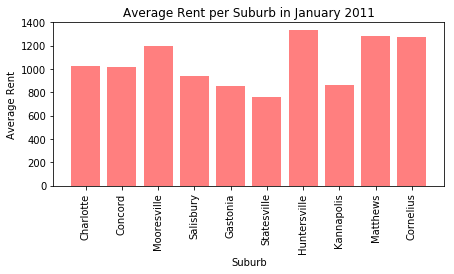

In [102]:
plt.figure(figsize=(7,3))
plt.bar(x_axis, charlotte["January 2011 Avg Rent"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, charlotte["Suburb"], rotation="vertical")

plt.title("Average Rent per Suburb in January 2011")
plt.xlabel("Suburb")
plt.ylabel("Average Rent")

Text(0,0.5,'Average Rent')

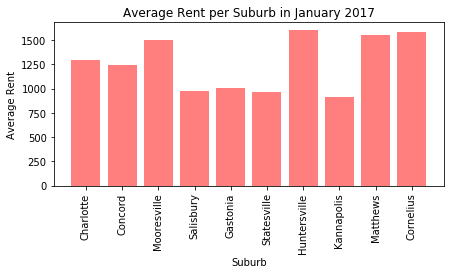

In [101]:
plt.figure(figsize=(7,3))
plt.bar(x_axis, charlotte["January 2017 Avg Rent"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, charlotte["Suburb"], rotation="vertical")

plt.title("Average Rent per Suburb in January 2017")
plt.xlabel("Suburb")
plt.ylabel("Average Rent")

In [69]:
# Make a line graph showing the increase of avg rent per year
avg_january_2011_rent = charlotte.groupby("State")["January 2011 Avg Rent"].mean()

avg_january_2011_rent

State
NC    1054.7
Name: January 2011 Avg Rent, dtype: float64

In [70]:
avg_january_2012_rent = charlotte.groupby("State")["January 2012 Avg Rent"].mean()

avg_january_2012_rent

State
NC    1069.3
Name: January 2012 Avg Rent, dtype: float64

In [71]:
avg_january_2013_rent = charlotte.groupby("State")["January 2013 Avg Rent"].mean()

avg_january_2013_rent

State
NC    1099.8
Name: January 2013 Avg Rent, dtype: float64

In [72]:
avg_january_2014_rent = charlotte.groupby("State")["January 2014 Avg Rent"].mean()

avg_january_2014_rent

State
NC    1145
Name: January 2014 Avg Rent, dtype: int64

In [73]:
avg_january_2015_rent = charlotte.groupby("State")["January 2015 Avg Rent"].mean()

avg_january_2015_rent

State
NC    1178.3
Name: January 2015 Avg Rent, dtype: float64

In [74]:
avg_january_2016_rent = charlotte.groupby("State")["January 2016 Avg Rent"].mean()

avg_january_2016_rent

State
NC    1217.7
Name: January 2016 Avg Rent, dtype: float64

In [75]:
avg_january_2017_rent = charlotte.groupby("State")["January 2017 Avg Rent"].mean()

avg_january_2017_rent

State
NC    1262.6
Name: January 2017 Avg Rent, dtype: float64